In [1]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip


--2024-11-22 07:37:45--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.10.196, 3.5.25.130, 3.5.17.101, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.10.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  13.6MB/s    in 23m 30s 

2024-11-22 08:01:16 (13.1 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2024-11-22 08:01:16--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.33.185, 3.5.2.219, 16.182.39.49, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.33.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[==================

In [2]:
from zipfile import ZipFile, BadZipFile
import os

def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)

        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)

    except BadZipFile as e:
        print("Error:", e)


extract_ANN_path = "/content/coco_ann2017"
extract_VAL_path = "/content/coco_val2017"
extract_Train_path = "/content/coco_train2017"

extract_zip_file(extract_Train_path)
extract_zip_file(extract_VAL_path)
extract_zip_file(extract_ANN_path)


In [3]:
from pycocotools.coco import COCO
import json

# Path to the COCO annotations file (usually .json format)
coco_annotation_file = '/content/coco_ann2017/annotations/instances_train2017.json'  # Update with the correct path to your COCO annotations file

# Load COCO annotations
coco = COCO(coco_annotation_file)

# Get all category IDs
category_ids = coco.getCatIds()

# Load categories (classes)
categories = coco.loadCats(category_ids)

# Extract category names (class names)
class_names = [category['name'] for category in categories]

# Print the class names
print(class_names)

# Save the class names to a file if needed
with open('coco_classes.txt', 'w') as f:
    for class_name in class_names:
        f.write(f"{class_name}\n")


loading annotations into memory...
Done (t=15.89s)
creating index...
index created!
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
class_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 45.2 MB/s eta 0:00:00


In [ ]:
import os
import json
from pycocotools.coco import COCO

def convert_coco_to_yolo(coco_annotation_file, image_dir, output_dir):
    coco = COCO(coco_annotation_file)

    # Create output directories for images and labels
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)

    # Get all image IDs
    image_ids = coco.getImgIds()

    for img_id in image_ids:
        img_info = coco.loadImgs(img_id)[0]
        img_filename = img_info['file_name']
        img_path = os.path.join(image_dir, img_filename)

        # Copy image to output directory
        output_image_path = os.path.join(output_dir, 'images', img_filename)
        if not os.path.exists(output_image_path):
            os.system(f'cp {img_path} {output_image_path}')

        # Create annotation file for each image
        annotation_file = os.path.join(output_dir, 'labels', img_filename.replace('.jpg', '.txt'))

        # Get annotations for the image
        ann_ids = coco.getAnnIds(imgIds=img_id)
        annotations = coco.loadAnns(ann_ids)

        with open(annotation_file, 'w') as f:
            for ann in annotations:
                category_id = ann['category_id'] - 1  # COCO categories are 1-indexed
                bbox = ann['bbox']  # [x, y, width, height]
                x, y, w, h = bbox

                # Normalize the bounding box
                img_width = img_info['width']
                img_height = img_info['height']

                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width = w / img_width
                height = h / img_height

                # Write to label file in YOLO format
                f.write(f"{category_id} {x_center} {y_center} {width} {height}\n")

# Example usage
coco_annotation_file = '/content/coco_ann2017/annotations/instances_train2017.json'
image_dir = '/content/coco_train2017/train2017'
output_dir = 'yolo_train'

# coco_annotation_file_val = '/content/coco_ann2017/annotations/instances_val2017.json'
# image_dir_val = '/content/coco_val2017/val2017'
# output_dir_val = 'yolo_val'

convert_coco_to_yolo(coco_annotation_file, image_dir, output_dir)
# convert_coco_to_yolo(coco_annotation_file_val, image_dir_val, output_dir_val)



loading annotations into memory...
Done (t=20.12s)
creating index...
index created!


In [4]:
import os
import shutil
from pycocotools.coco import COCO

def convert_coco_to_yolo(coco_annotation_file, image_dir, output_dir, max_class=80):
    coco = COCO(coco_annotation_file)

    # Create output directories for images and labels
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)

    # Get all image IDs
    image_ids = coco.getImgIds()

    for img_id in image_ids:
        img_info = coco.loadImgs(img_id)[0]
        img_filename = img_info['file_name']
        img_path = os.path.join(image_dir, img_filename)

        # Handle possible extensions like .jpeg, .png
        if not os.path.exists(img_path):
            img_filename = img_filename.replace('.jpg', '.jpeg')  # Adjust based on extensions in your dataset
            img_path = os.path.join(image_dir, img_filename)

        if os.path.exists(img_path):
            # Copy image to output directory
            output_image_path = os.path.join(output_dir, 'images', img_filename)
            shutil.copy(img_path, output_image_path)  # Using shutil.copy for better compatibility
        else:
            print(f"Image not found: {img_path}")
            continue  # Skip if image is not found

        # Create annotation file for each image
        annotation_file = os.path.join(output_dir, 'labels', img_filename.replace('.jpg', '.txt').replace('.jpeg', '.txt'))

        # Get annotations for the image
        ann_ids = coco.getAnnIds(imgIds=img_id)
        annotations = coco.loadAnns(ann_ids)

        with open(annotation_file, 'w') as f:
            for ann in annotations:
                category_id = ann['category_id'] - 1  # COCO categories are 1-indexed, so subtract 1
                if category_id >= max_class:
                    continue  # Skip categories greater than the allowed class range

                bbox = ann['bbox']  # [x, y, width, height]
                x, y, w, h = bbox

                # Normalize the bounding box
                img_width = img_info['width']
                img_height = img_info['height']

                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width = w / img_width
                height = h / img_height

                # Write to label file in YOLO format
                f.write(f"{category_id} {x_center} {y_center} {width} {height}\n")

# Example usage for validation set
coco_annotation_file_val = '/content/coco_ann2017/annotations/instances_val2017.json'
image_dir_val = '/content/coco_val2017/val2017'
output_dir_val = 'yolo_val'

coco_annotation_file = '/content/coco_ann2017/annotations/instances_train2017.json'
image_dir = '/content/coco_train2017/train2017'
output_dir = 'yolo_train'
convert_coco_to_yolo(coco_annotation_file, image_dir, output_dir)

convert_coco_to_yolo(coco_annotation_file_val, image_dir_val, output_dir_val, max_class=80)


loading annotations into memory...
Done (t=16.22s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [6]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 152MB/s]


In [ ]:
import os
from collections import Counter

# Path to your validation labels directory
labels_dir = '/content/yolo_val/labels'

# Initialize a counter to count class occurrences
class_counts = Counter()

# Loop through all label files
for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):  # Ensure it's a label file
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            for line in f:
                class_id = int(line.split()[0])  # Extract class_id
                class_counts[class_id] += 1

# Print counts
for class_id, count in sorted(class_counts.items()):
    print(f"Class {class_id}: {count} instances")


Class 0: 11004 instances
Class 1: 316 instances
Class 2: 1932 instances
Class 3: 371 instances
Class 4: 143 instances
Class 5: 285 instances
Class 6: 190 instances
Class 7: 415 instances
Class 8: 430 instances
Class 9: 637 instances
Class 10: 101 instances
Class 12: 75 instances
Class 13: 60 instances
Class 14: 413 instances
Class 15: 440 instances
Class 16: 202 instances
Class 17: 218 instances
Class 18: 273 instances
Class 19: 361 instances
Class 20: 380 instances
Class 21: 255 instances
Class 22: 71 instances
Class 23: 268 instances
Class 24: 232 instances
Class 26: 371 instances
Class 27: 413 instances
Class 30: 540 instances
Class 31: 254 instances
Class 32: 303 instances
Class 33: 115 instances
Class 34: 241 instances
Class 35: 69 instances
Class 36: 263 instances
Class 37: 336 instances
Class 38: 146 instances
Class 39: 148 instances
Class 40: 179 instances
Class 41: 269 instances
Class 42: 225 instances
Class 43: 1025 instances
Class 45: 343 instances
Class 46: 899 instances
Cl

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.val(data='/content/data.yaml')


Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/yolo_val/labels.cache... 5000 images, 198 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:53<00:00,  5.90it/s]


                   all       5000      34430      0.129       0.09     0.0998       0.07
                person       2693      11004      0.753       0.66       0.73      0.504
               bicycle        149        316      0.693      0.396      0.458      0.264
                   car        535       1932      0.645      0.512      0.557      0.361
            motorcycle        159        371      0.709      0.574       0.65      0.409
              airplane         97        143      0.815      0.768      0.832      0.653
                   bus        189        285      0.746      0.639      0.733      0.615
                 train        157        190      0.798      0.771      0.834      0.646
                 truck        250        415       0.55        0.4      0.434      0.293
                  boat        121        430      0.583      0.296      0.373      0.208
         traffic light        191        637      0.639      0.344      0.407       0.21
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff65bfc21a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [ ]:
!export TORCH_USE_CUDA_DSA=1


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [13]:
model1 = YOLO("yolo11n.pt")

# Train the model
model1.train(
    data='/content/data.yaml',  # Path to your YAML config file
    epochs=10,                  # Number of epochs
    batch=16,                   # Batch size
    imgsz=640,                  # Image size (recommended: 640x640)
    device='0',                 # GPU device (use 'cpu' for CPU training)
)


Ultralytics 8.3.35 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning /content/yolo_train/labels.cache... 118287 images, 4296 backgrounds, 0 corrupt: 100%|██████████| 118287/118287 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/yolo_train/images/000000099844.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/yolo_train/images/000000201706.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolo_train/images/000000214087.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolo_train/images/000000522365.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolo_val/labels.cache... 5000 images, 198 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.18G      1.208       1.63      1.232        121        640: 100%|██████████| 7393/7393 [16:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:22<00:00,  7.04it/s]


                   all       5000      34430      0.553      0.402      0.422      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.09G      1.357      1.765      1.347         72        640: 100%|██████████| 7393/7393 [14:11<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:22<00:00,  7.06it/s]


                   all       5000      34430      0.533       0.39      0.405      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.21G      1.456       1.99      1.432         85        640: 100%|██████████| 7393/7393 [13:50<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:22<00:00,  6.99it/s]


                   all       5000      34430       0.52      0.363      0.382      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.16G      1.452      1.974      1.434        124        640: 100%|██████████| 7393/7393 [13:46<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:22<00:00,  7.05it/s]


                   all       5000      34430      0.533      0.389      0.407      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.27G       1.38      1.794      1.383         91        640: 100%|██████████| 7393/7393 [13:45<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:22<00:00,  7.04it/s]


                   all       5000      34430      0.542      0.411      0.431      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.29G      1.333      1.675      1.347        124        640: 100%|██████████| 7393/7393 [13:43<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:21<00:00,  7.15it/s]


                   all       5000      34430       0.55      0.427      0.449      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.27G      1.294       1.58      1.318         95        640: 100%|██████████| 7393/7393 [13:44<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:22<00:00,  7.12it/s]


                   all       5000      34430      0.564      0.433       0.46       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.08G      1.258      1.495      1.291        172        640: 100%|██████████| 7393/7393 [13:38<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:21<00:00,  7.22it/s]


                   all       5000      34430      0.568      0.443      0.468      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.26G      1.226      1.417      1.267         83        640: 100%|██████████| 7393/7393 [13:33<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:21<00:00,  7.14it/s]


                   all       5000      34430      0.572      0.447      0.474      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.17G      1.191       1.34      1.242         74        640: 100%|██████████| 7393/7393 [13:32<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:21<00:00,  7.17it/s]


                   all       5000      34430      0.591      0.445      0.479      0.335

10 epochs completed in 2.403 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:25<00:00,  6.06it/s]


                   all       5000      34430      0.593      0.444      0.479      0.335
                person       2693      11004      0.751      0.625      0.709      0.478
               bicycle        149        316       0.59      0.367      0.386      0.221
                   car        535       1932      0.605      0.484      0.518      0.325
            motorcycle        159        371      0.681      0.501      0.587      0.369
              airplane         97        143      0.771      0.713      0.774      0.594
                   bus        189        285      0.715       0.66      0.706      0.581
                 train        157        190       0.77      0.747      0.803       0.62
                 truck        250        415      0.552      0.353      0.403      0.258
                  boat        121        430      0.558      0.294      0.349      0.179
         traffic light        191        637      0.547      0.336      0.363      0.177
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c798029d900>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [22]:
results = model1.predict(source='/content/coco_val2017/val2017/000000032081.jpg', save=True)



image 1/1 /content/coco_val2017/val2017/000000032081.jpg: 640x480 1 person, 1 fork, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train36



image 1/1 /content/coco_val2017/val2017/000000032081.jpg: 640x480 1 person, 1 fork, 11.9ms
Speed: 2.5ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


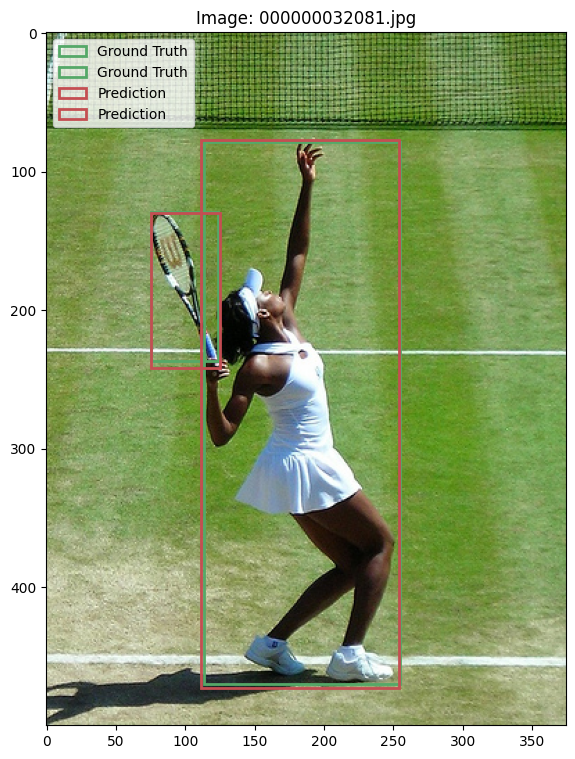

Average IoU for selected images: 0.4814


In [23]:
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO  # Import the YOLO model

# Load COCO annotations
with open("/content/coco_ann2017/annotations/instances_val2017.json", "r") as f:
    coco_data = json.load(f)

# Function to compute IoU
def compute_iou(box1, box2):
    """
    Compute the IoU between two bounding boxes.
    box1, box2: [xmin, ymin, xmax, ymax]
    """
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

# Parse ground truth bounding boxes
def get_ground_truth_boxes(image_id, annotations):
    """
    Extract ground truth boxes for a specific image.
    """
    return [
        [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]  # Convert to [xmin, ymin, xmax, ymax]
        for ann in annotations
        if ann["image_id"] == image_id and ann["iscrowd"] == 0
        for bbox in [ann["bbox"]]
    ]

# Function to evaluate IoU for specific image paths and display them
def evaluate_iou(image_paths, coco_data, model):
    total_iou = 0
    num_comparisons = 0

    # Create a mapping of image file names to IDs
    image_id_map = {img["file_name"]: img["id"] for img in coco_data["images"]}

    for image_path in image_paths:
        # Extract file name from the path
        file_name = image_path.split("/")[-1]

        # Get the image ID from the mapping
        image_id = image_id_map.get(file_name)
        if image_id is None:
            print(f"Image {file_name} not found in COCO dataset.")
            continue

        # Get ground truth boxes
        gt_boxes = get_ground_truth_boxes(image_id, coco_data["annotations"])

        # Get predictions from YOLO model
        results = model.predict(image_path, save=False)
        pred_boxes = results[0].boxes.xyxy.cpu().numpy()  # Convert to numpy array

        # Visualize the image and draw bounding boxes
        image = Image.open(image_path)
        fig, ax = plt.subplots(1, figsize=(12, 9))
        ax.imshow(image)

        # Draw ground truth boxes
        for gt_box in gt_boxes:
            rect = patches.Rectangle(
                (gt_box[0], gt_box[1]), gt_box[2] - gt_box[0], gt_box[3] - gt_box[1],
                linewidth=2, edgecolor='g', facecolor='none', label="Ground Truth"
            )
            ax.add_patch(rect)

        # Draw predicted boxes
        for pred_box in pred_boxes:
            rect = patches.Rectangle(
                (pred_box[0], pred_box[1]), pred_box[2] - pred_box[0], pred_box[3] - pred_box[1],
                linewidth=2, edgecolor='r', facecolor='none', label="Prediction"
            )
            ax.add_patch(rect)

        plt.title(f"Image: {file_name}")
        plt.legend(loc="upper left")
        plt.show()

        # Compare each prediction with ground truth
        for pred_box in pred_boxes:
            for gt_box in gt_boxes:
                iou = compute_iou(pred_box, gt_box)
                total_iou += iou
                num_comparisons += 1

    # Calculate average IoU
    average_iou = total_iou / num_comparisons if num_comparisons > 0 else 0
    return average_iou



# List of specific image paths to evaluate
image_paths = [
    "/content/coco_val2017/val2017/000000032081.jpg",
    # Add more image paths as needed
]

# Evaluate IoU for the selected images
average_iou = evaluate_iou(image_paths, coco_data, model1)
print(f"Average IoU for selected images: {average_iou:.4f}")



image 1/1 /content/coco_val2017/val2017/000000024144.jpg: 480x640 1 potted plant, 1 keyboard, 14.4ms
Speed: 2.1ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


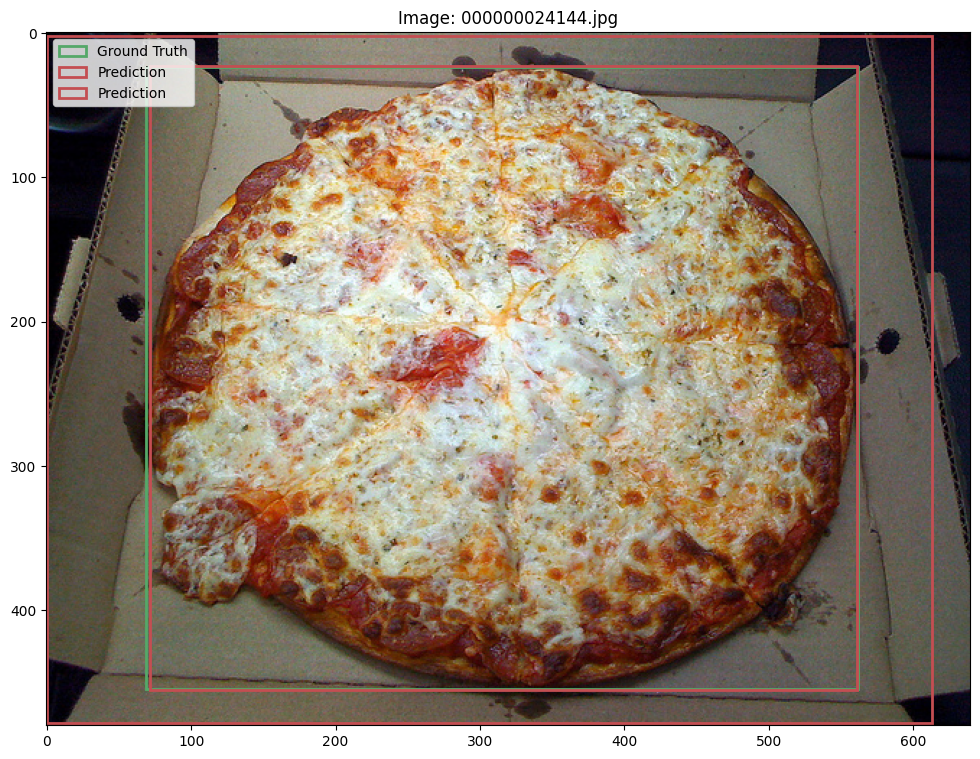

Average IoU for selected images: 0.8582


In [20]:
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO  # Import the YOLO model

# Load COCO annotations
with open("/content/coco_ann2017/annotations/instances_val2017.json", "r") as f:
    coco_data = json.load(f)

# Function to compute IoU
def compute_iou(box1, box2):
    """
    Compute the IoU between two bounding boxes.
    box1, box2: [xmin, ymin, xmax, ymax]
    """
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

# Parse ground truth bounding boxes
def get_ground_truth_boxes(image_id, annotations):
    """
    Extract ground truth boxes for a specific image.
    """
    return [
        [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]  # Convert to [xmin, ymin, xmax, ymax]
        for ann in annotations
        if ann["image_id"] == image_id and ann["iscrowd"] == 0
        for bbox in [ann["bbox"]]
    ]

# Function to evaluate IoU for specific image paths and display them
def evaluate_iou(image_paths, coco_data, model):
    total_iou = 0
    num_comparisons = 0

    # Create a mapping of image file names to IDs
    image_id_map = {img["file_name"]: img["id"] for img in coco_data["images"]}

    for image_path in image_paths:
        # Extract file name from the path
        file_name = image_path.split("/")[-1]

        # Get the image ID from the mapping
        image_id = image_id_map.get(file_name)
        if image_id is None:
            print(f"Image {file_name} not found in COCO dataset.")
            continue

        # Get ground truth boxes
        gt_boxes = get_ground_truth_boxes(image_id, coco_data["annotations"])

        # Get predictions from YOLO model
        results = model.predict(image_path, save=False)
        pred_boxes = results[0].boxes.xyxy.cpu().numpy()  # Convert to numpy array

        # Visualize the image and draw bounding boxes
        image = Image.open(image_path)
        fig, ax = plt.subplots(1, figsize=(12, 9))
        ax.imshow(image)

        # Draw ground truth boxes
        for gt_box in gt_boxes:
            rect = patches.Rectangle(
                (gt_box[0], gt_box[1]), gt_box[2] - gt_box[0], gt_box[3] - gt_box[1],
                linewidth=2, edgecolor='g', facecolor='none', label="Ground Truth"
            )
            ax.add_patch(rect)

        # Draw predicted boxes
        for pred_box in pred_boxes:
            rect = patches.Rectangle(
                (pred_box[0], pred_box[1]), pred_box[2] - pred_box[0], pred_box[3] - pred_box[1],
                linewidth=2, edgecolor='r', facecolor='none', label="Prediction"
            )
            ax.add_patch(rect)

        plt.title(f"Image: {file_name}")
        plt.legend(loc="upper left")
        plt.show()

        # Compare each prediction with ground truth
        for pred_box in pred_boxes:
            for gt_box in gt_boxes:
                iou = compute_iou(pred_box, gt_box)
                total_iou += iou
                num_comparisons += 1

    # Calculate average IoU
    average_iou = total_iou / num_comparisons if num_comparisons > 0 else 0
    return average_iou



# List of specific image paths to evaluate
image_paths = [
    "/content/coco_val2017/val2017/000000024144.jpg",
    # Add more image paths as needed
]

# Evaluate IoU for the selected images
average_iou = evaluate_iou(image_paths, coco_data, model1)
print(f"Average IoU for selected images: {average_iou:.4f}")
